In [7]:
#We have to to perform exploratory data analysis first to understand the data

#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
#read the data
df = pd.read_csv('train.csv')

In [9]:
#find the shape of the dataset
df.shape

(1460, 81)

In [10]:
df.head() #first 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.tail() #last 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [12]:
#finding out how many NaN values are there in each feature

features_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.0055 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


**Find out relationship b/w missing values and label i.e, Sales Price**

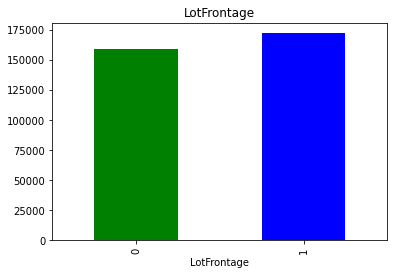

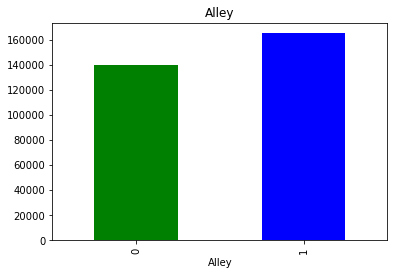

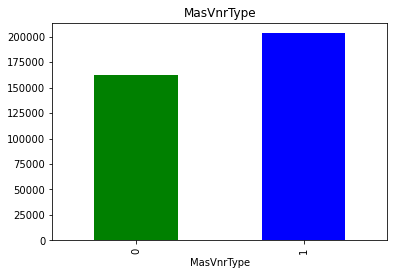

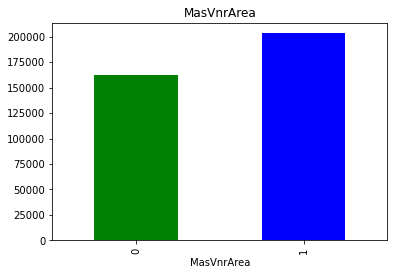

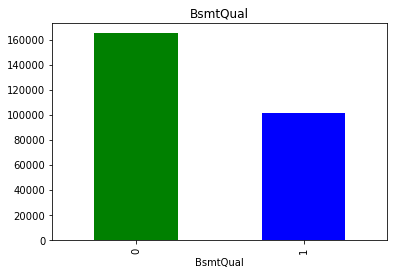

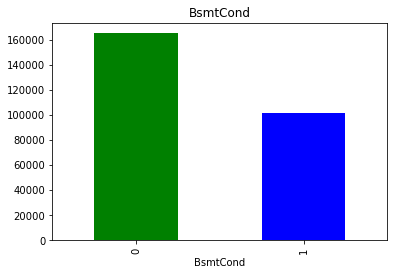

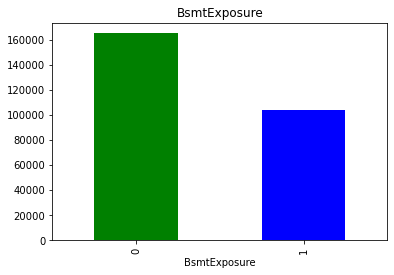

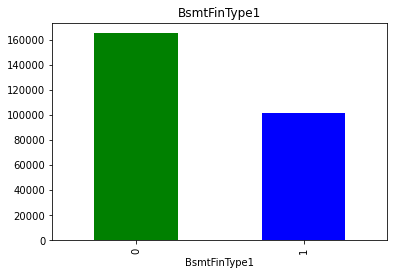

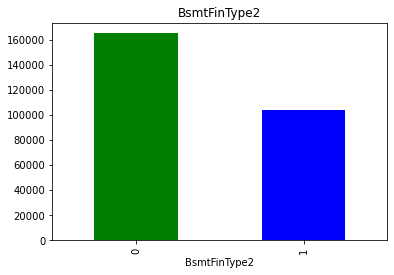

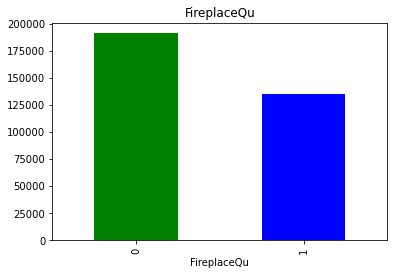

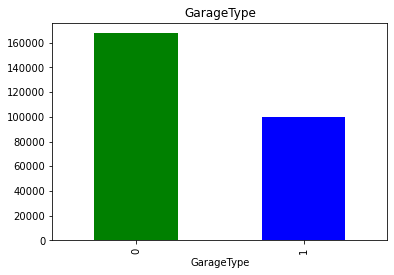

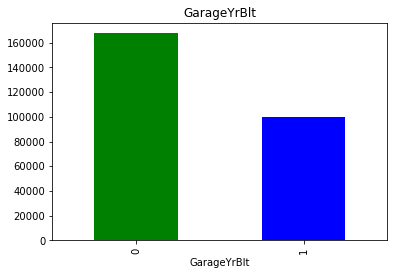

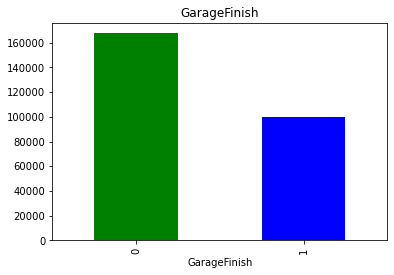

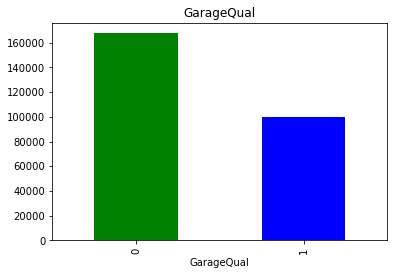

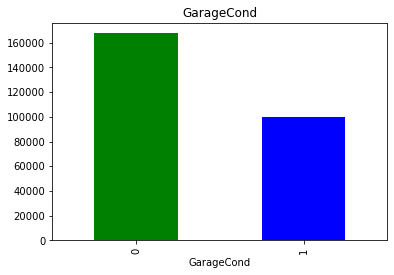

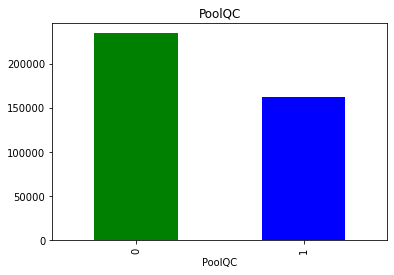

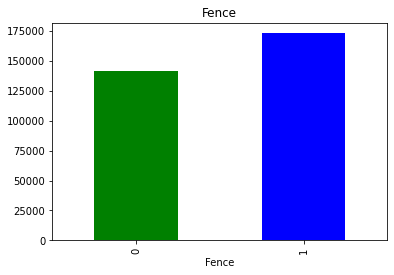

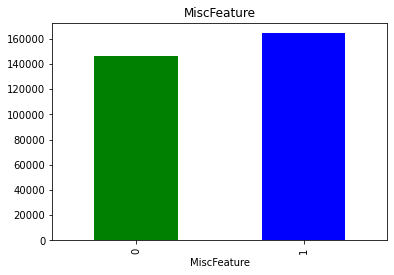

In [17]:
color=['green','blue']
for feature in features_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color)
    plt.title(feature)
    plt.show()

As you can see the Sale Price is dependant on the missing values. Therefore we have to handle missing values and we cannot simply drop it because of the dependancy.